# Installing Important Libraries

In [ ]:
% pip install tweepy

In [ ]:
% pip install textblob

# Import Libraries

In [ ]:
import tweepy
from textblob import TextBlob
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Import the configuration i.e keys saved from twitter developer account

In [ ]:
#import the configuration
#twitter access tokens
config = pd.read_csv('https://raw.githubusercontent.com/chinmayee521/Data/main/config.csv?token=AMJAJYRLTHHX2CVM76DCLDTA5ZPGU')


In [ ]:
#retrieve all the individual keys
twitterApiKey = config['twitterApiKey'][0]
twitterApiSecret = config['twitterApiSecret'][0]
twitterApiAccessToken = config['twitterApiAccessToken'][0]
twitterApiAccessTokenSecret = config['twitterApiAccessTokenSecret'][0]

# Authenticate and set token using Tweepy

In [ ]:
#Authenticate token using Tweepy
auth = tweepy.OAuthHandler(twitterApiKey, twitterApiSecret)
#Set access token
auth.set_access_token(twitterApiAccessToken, twitterApiAccessTokenSecret)
#Authenticate using tweepy api function
twitterApi = tweepy.API(auth, wait_on_rate_limit = True)

In [ ]:
#user input
twitterAccount = "srbachchan"

In [ ]:
#exclude replies, 50 tweets from twitter account will be retrieved in tweets
tweets = tweepy.Cursor(twitterApi.user_timeline,
                       screen_name = twitterAccount,
                       count = None,
                       since_id = None,
                       max_id = None, trim_user = True, exclude_replies = True,
                       contributor_details = False,
                       include_entities = False).items(50);

# Create dataframe with tweets

In [ ]:
#takes all 50 tweets and forms a dataframe with column name Tweet
df = pd.DataFrame(data = [tweet.text for tweet in tweets], columns = ['Tweet'])

In [ ]:
#look up 5 rows from df
df.head()

,Tweet
0,"T 3958 -"" 🙏🙏🙏🙏🙏\n\nAn epic era has drawn curta..."
1,T 3958 - An institution has gone .. whenever t...
2,T 3957 - ... a prayer for them that suffer mis...
3,"T 3956 - ये दुनिया, दुनिया न रहकर ; सुझाओं की ..."
4,T 3955 - सुनो सुनो ऐ दुनिया वालों :\nये virus...


In [ ]:
def cleanUpTweet(txt):
  #remove all the mentions using regular expression
  txt = re.sub(r'@[A-Za-z0-9_]+', '', txt)
  #remove hashtags
  txt = re.sub(r'#', '', txt)
  #remove retweets
  txt = re.sub(r'RT : ', '', txt)
  #remove urls
  txt = re.sub(r'https?:\/\/[A-Za-z0-9\.\/]+', '', txt)
  return txt

In [ ]:
#apply cleanUpTweet function to all the tweets
df['Tweet'] = df['Tweet'].apply(cleanUpTweet)

# Get subjectivity and polarity of tweets using TextBlob

In [ ]:
def getTextSubjectivity(txt):
  return TextBlob(txt).sentiment.subjectivity

In [ ]:
def getTextPolarity(txt):
  return TextBlob(txt).sentiment.polarity

In [ ]:
#apply getTextSubjectivity and getTextPolarity functions to df

#create new column Subjecivity in df
df['Subjectivity'] = df['Tweet'].apply(getTextSubjectivity)

#create new column Polarity in df
df['Polarity'] = df['Tweet'].apply(getTextPolarity)

In [ ]:
df.head(10)

,Tweet,Subjectivity,Polarity
0,"T 3958 -"" 🙏🙏🙏🙏🙏\n\nAn epic era has drawn curta...",0.400,0.1
1,T 3958 - An institution has gone .. whenever t...,0.000,0.0
2,T 3957 - ... a prayer for them that suffer mis...,0.000,0.0
3,"T 3956 - ये दुनिया, दुनिया न रहकर ; सुझाओं की ...",0.000,0.0
4,T 3955 - सुनो सुनो ऐ दुनिया वालों :\nये virus...,0.000,0.0
5,you make us so proud .. ❤️,1.000,0.8
6,"T 3954 - क्या कर लोगे भैया ? नहीं, बोलो तो !!",0.000,0.0
7,T 3953(i) . CORRECTION :\nIt is national Docto...,0.000,0.0
8,T 3953 - \nOn International Doctors Day .. sal...,0.375,0.4
9,T 3952 -\nये कैसा सौदा वक्त मुझसे कर गया\nतजुर...,0.000,0.0


In [ ]:
#drop all columns having null tweets
df = df.drop(df[df['Tweet']==''].index)

In [ ]:
df.head()

,Tweet,Subjectivity,Polarity
0,"T 3958 -"" 🙏🙏🙏🙏🙏\n\nAn epic era has drawn curta...",0.4,0.1
1,T 3958 - An institution has gone .. whenever t...,0.0,0.0
2,T 3957 - ... a prayer for them that suffer mis...,0.0,0.0
3,"T 3956 - ये दुनिया, दुनिया न रहकर ; सुझाओं की ...",0.0,0.0
4,T 3955 - सुनो सुनो ऐ दुनिया वालों :\nये virus...,0.0,0.0


In [ ]:
df1 = df.head(10)
print(df1)

                                               Tweet  Subjectivity  Polarity
0  T 3958 -" 🙏🙏🙏🙏🙏\n\nAn epic era has drawn curta...         0.400       0.1
1  T 3958 - An institution has gone .. whenever t...         0.000       0.0
2  T 3957 - ... a prayer for them that suffer mis...         0.000       0.0
3  T 3956 - ये दुनिया, दुनिया न रहकर ; सुझाओं की ...         0.000       0.0
4  T 3955 - सुनो सुनो ऐ दुनिया वालों  :\nये virus...         0.000       0.0
5                        you make us so proud .. ❤️          1.000       0.8
6    T 3954 - क्या कर लोगे भैया  ? नहीं, बोलो तो  !!         0.000       0.0
7  T 3953(i) . CORRECTION :\nIt is national Docto...         0.000       0.0
8  T 3953 - \nOn International Doctors Day .. sal...         0.375       0.4
9  T 3952 -\nये कैसा सौदा वक्त मुझसे कर गया\nतजुर...         0.000       0.0


# Text Analysis

In [ ]:
#polarity value < 0  -> negative sentiment
#polarity value = 0  -> neutral sentiment
#polarity value > 0  -> positive sentiment

#define a function for this

def getTextAnalysis(pol):
  if pol < 0:
    return "Negative"
  elif pol == 0:
    return "Neutral"
  else:
    return "Positive"

In [ ]:
#apply to polarity column in df, create new column Sentiment

df['Sentiment'] = df['Polarity'].apply(getTextAnalysis)

In [ ]:
df.head(50)

,Tweet,Subjectivity,Polarity,Sentiment
0,"T 3958 -"" 🙏🙏🙏🙏🙏\n\nAn epic era has drawn curta...",0.400000,0.100000,Positive
1,T 3958 - An institution has gone .. whenever t...,0.000000,0.000000,Neutral
2,T 3957 - ... a prayer for them that suffer mis...,0.000000,0.000000,Neutral
3,"T 3956 - ये दुनिया, दुनिया न रहकर ; सुझाओं की ...",0.000000,0.000000,Neutral
4,T 3955 - सुनो सुनो ऐ दुनिया वालों :\nये virus...,0.000000,0.000000,Neutral
5,you make us so proud .. ❤️,1.000000,0.800000,Positive
6,"T 3954 - क्या कर लोगे भैया ? नहीं, बोलो तो !!",0.000000,0.000000,Neutral
7,T 3953(i) . CORRECTION :\nIt is national Docto...,0.000000,0.000000,Neutral
8,T 3953 - \nOn International Doctors Day .. sal...,0.375000,0.400000,Positive
9,T 3952 -\nये कैसा सौदा वक्त मुझसे कर गया\nतजुर...,0.000000,0.000000,Neutral


In [ ]:
#calculate positive percentage
positive = df[df['Sentiment']=='Positive']
print(str(positive.shape[0]/(df.shape[0])*100)+"% of positive tweets")
pos = positive.shape[0]/df.shape[0]*100

30.0% of positive tweets


In [ ]:
#calculate negative percentage
negative = df[df['Sentiment']=='Negative']
print(str(negative.shape[0]/(df.shape[0])*100)+"% of negative tweets")
neg = negative.shape[0]/df.shape[0]*100

0.0% of negative tweets


In [ ]:
#calculate neutral percentage
neutral = df[df['Sentiment']=='Neutral']
print(str(neutral.shape[0]/(df.shape[0])*100)+"% of neutral tweets")
neu = neutral.shape[0]/df.shape[0]*100

70.0% of neutral tweets


# Visualization using Pie Chart

In [ ]:
explode = (0,0.1,0)
labels = 'Positive', 'Negative', 'Neutral'
sizes = [pos,neg,neu]
colors = ['yellowgreen', 'lightcoral', 'gold']

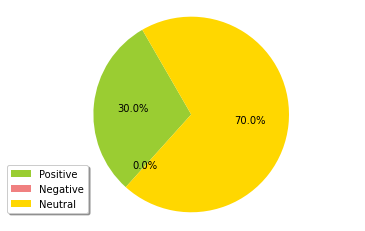

In [ ]:
plt.pie(sizes, explode, colors = colors, autopct = '%1.1f%%', startangle = 120)
plt.legend(labels, loc = (-0.05, 0.05), shadow = True)
plt.axis('equal')
plt.savefig("TwitterSentimentAnalysis.png")

['Neutral' 'Positive']
[35 15]


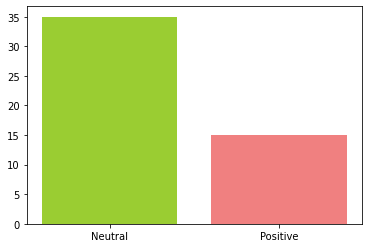

In [ ]:
labels = df.groupby('Sentiment').count().index.values
values = df.groupby('Sentiment').size().values
plt.bar(labels, values,color=colors)
print(labels)
print(values)

# Polarity VS Subjectivity

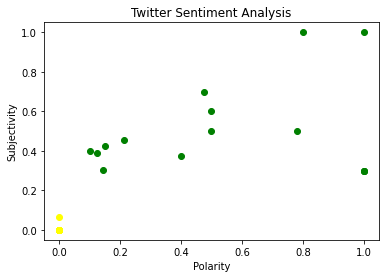

In [ ]:
for index, row in df.iterrows():
  if row['Sentiment'] == 'Positive':
    plt.scatter(row['Polarity'], row['Subjectivity'], color = 'green')
  elif row['Sentiment'] == 'Negative':
    plt.scatter(row['Polarity'], row['Subjectivity'], color = 'red')
  elif row['Sentiment'] == 'Neutral':
    plt.scatter(row['Polarity'], row['Subjectivity'], color = 'yellow')

plt.title("Twitter Sentiment Analysis")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.show()

# Word Cloud Visualization

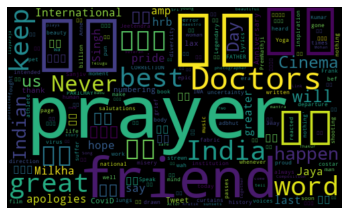

In [ ]:
# word cloud visualization
allWords = ' '.join([twts for twts in df['Tweet']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()